In [1]:
! pip install category_encoders

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Check Data

### Columns describe

- ID: ID Number of Customers.

- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.

- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.

- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

- Cost of the product-: Cost of the Product in US Dollars.

- Prior purchases:- The Number of Prior Purchase.

- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.

- Gender:- Male and Female.

- Discount offered:- Discount offered on that specific product.

- Weight in gms:- It is the weight in grams.

- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [3]:
df = pd.read_csv('Train.csv', index_col = 'ID')

In [4]:
print(f'\033[1m\033[95m  Data preview \nData  \n\033[96m{df.head()} \n  \033[95mshape  \n\033[96m{df.shape} \n \033[95mDescribe  \n\033[96m{df.describe()} \n  \033[95mNull check  \n\033[96m{df.isna().sum()}')

  Data preview 
Data  
   Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                          
1                D           Flight                    4                2   
2                F           Flight                    4                5   
3                A           Flight                    2                2   
4                B           Flight                    3                3   
5                C           Flight                    2                2   

    Cost_of_the_Product  Prior_purchases Product_importance Gender  \
ID                                                                   
1                   177                3                low      F   
2                   216                2                low      M   
3                   183                4                low      M   
4                   176                4             medium      M   
5                

# HeatMap : check correlation with each columns

## Numerical data

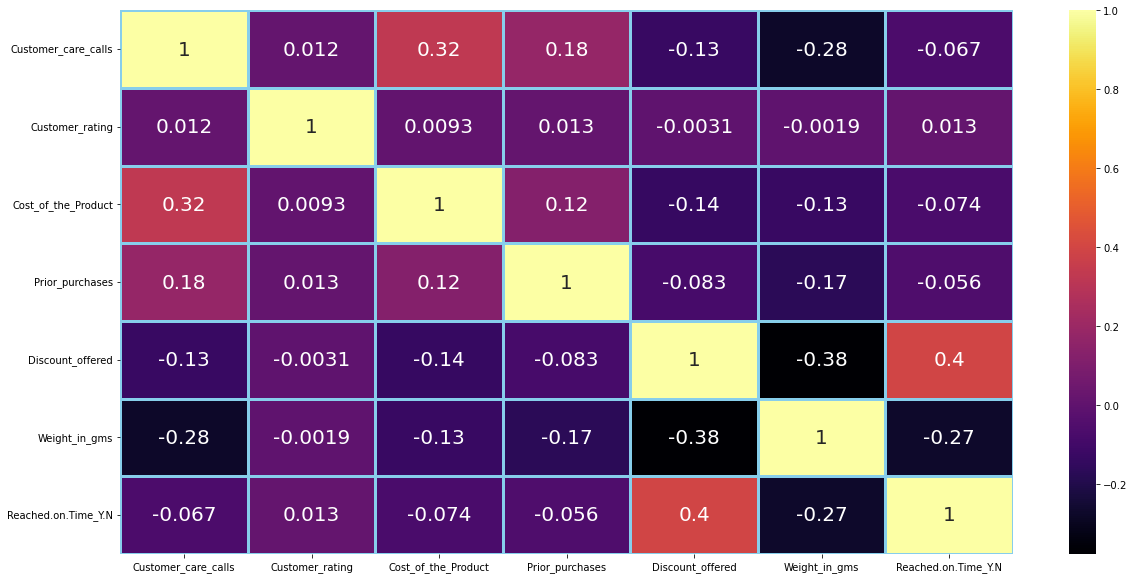

In [5]:
# make numerics list
numerics = ['int16','int32','int64']

# select by numerics list
df_num = df.select_dtypes(include = numerics)

# heatmap ( numerical columns )
plt.figure(figsize = (20, 10))
sns.heatmap(df_num.corr(), annot = True, linewidths = 3, cmap = 'inferno', linecolor = 'skyblue',annot_kws={"size": 20})
plt.show()

## OneHotEncoding

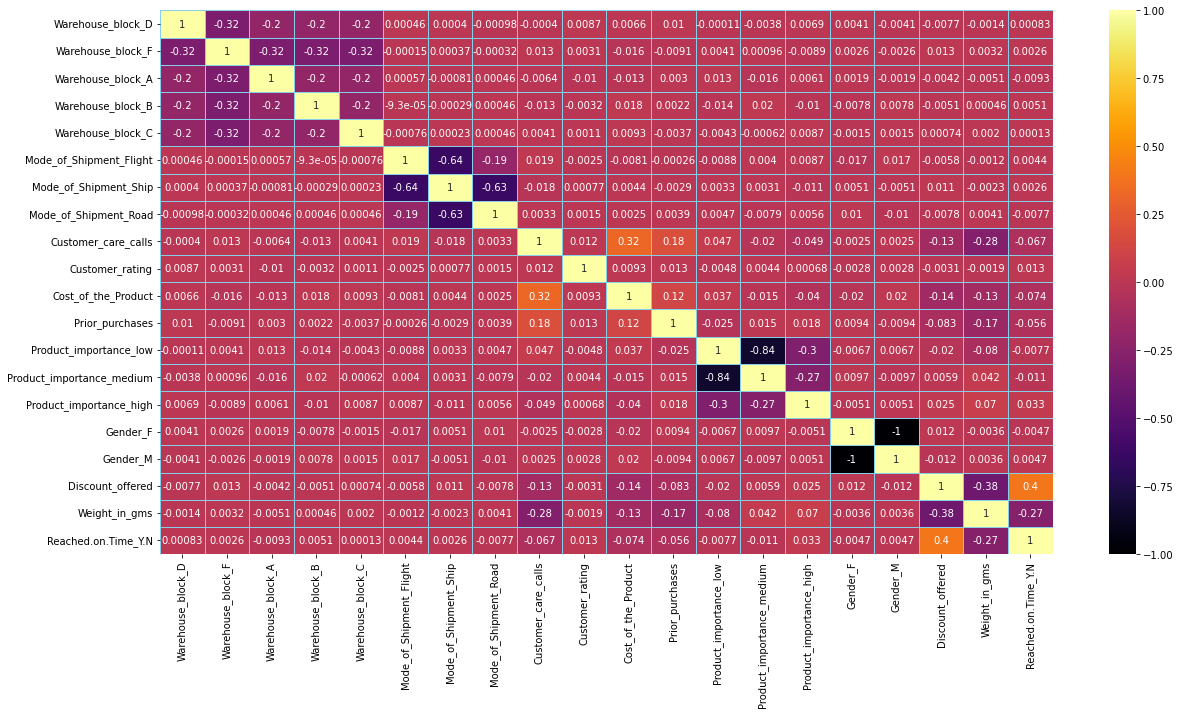

In [6]:
# For onehotencoding
encoder = OneHotEncoder(use_cat_names= True)
df_ecd = encoder.fit_transform(df)

# heatmap ( include categorical )
plt.figure(figsize = (20, 10))
sns.heatmap(df_ecd.corr(), annot = True, linewidths = 1, cmap = 'inferno', linecolor = 'skyblue')
plt.show()

## Category Data Ratio

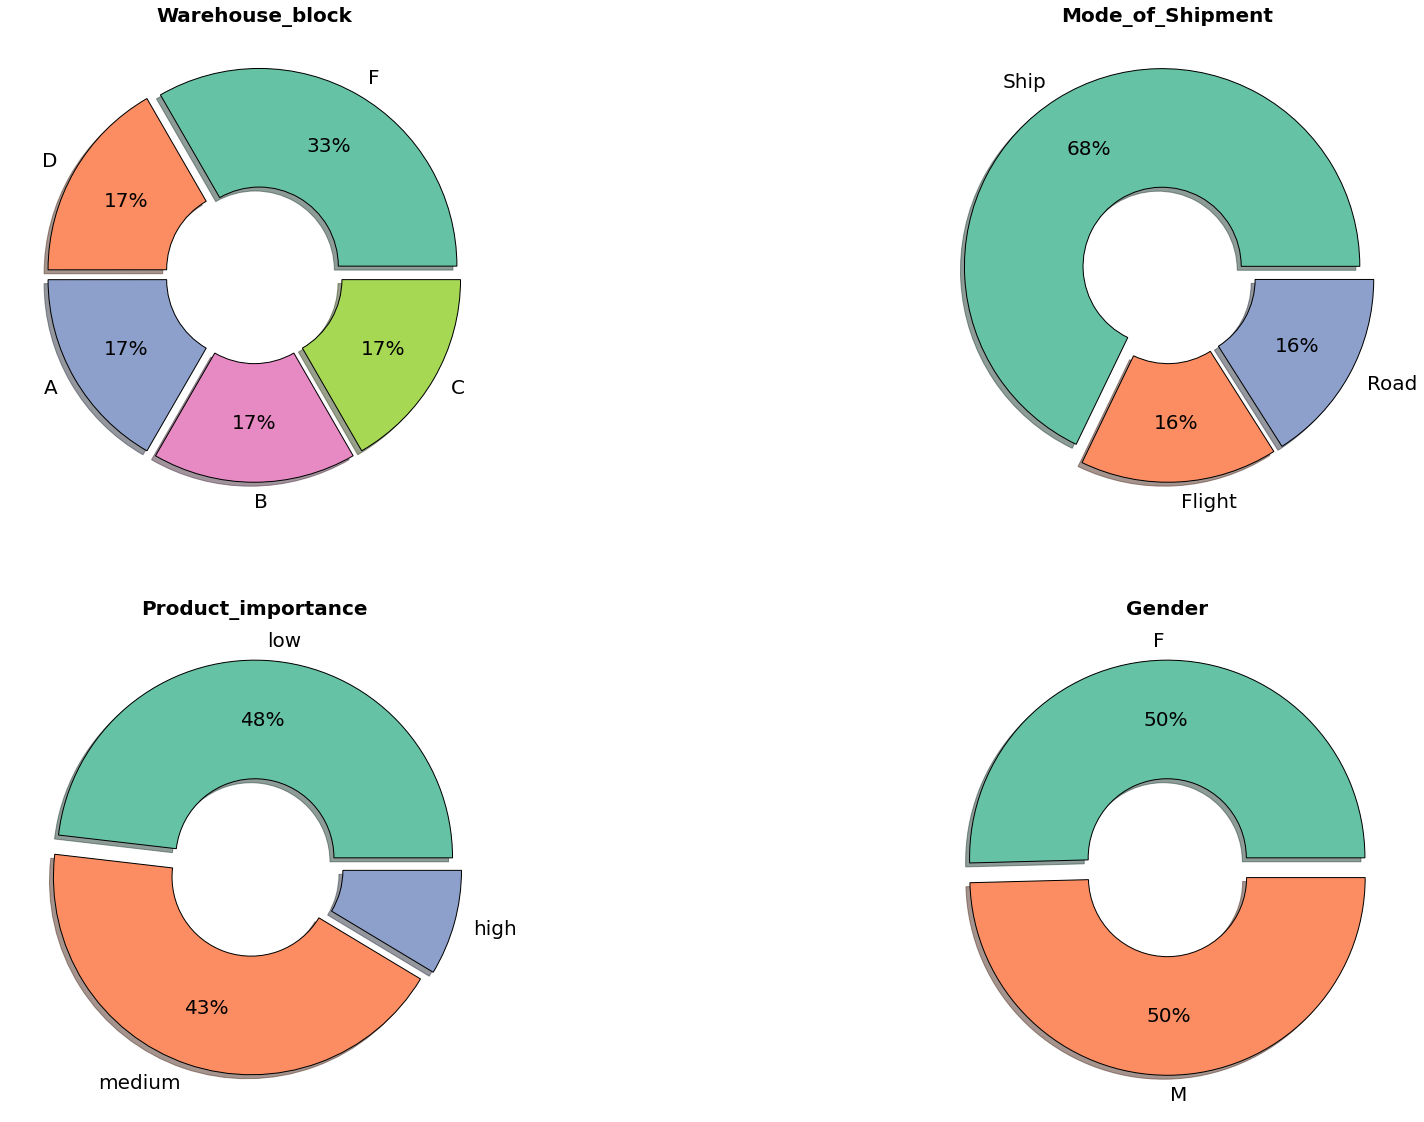

In [7]:
# plot size
fig, axes = plt.subplots(2,2, figsize = (30, 20))

# for pie plot property
textprops = dict(size=20, weight=10,color="black")
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
colors = sns.color_palette('Set2')[0:5]

# for pct
def custom_auto(pct):
  return('%.0f%%' % pct) if pct >=10 else ''

# categorical cols
features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# plt.pie
k=1
for i in range(len(features)):
  if k <= 4:
    ax = plt.subplot(2,2,k)
    plt.title(features[i], fontdict={'fontsize' : 20, 'fontweight' : 'bold'}, loc = 'center')
    df_i = df[features[i]].value_counts().reset_index()
    plt.pie(df_i[features[i]], labels = df_i['index'], autopct = custom_auto, 
            wedgeprops = wedgeprops, explode = [0.05] * len(df_i.index), colors = colors, pctdistance = 0.7,
            textprops = textprops, shadow = True)
    k += 1
    i += 1



# Feature Analysist

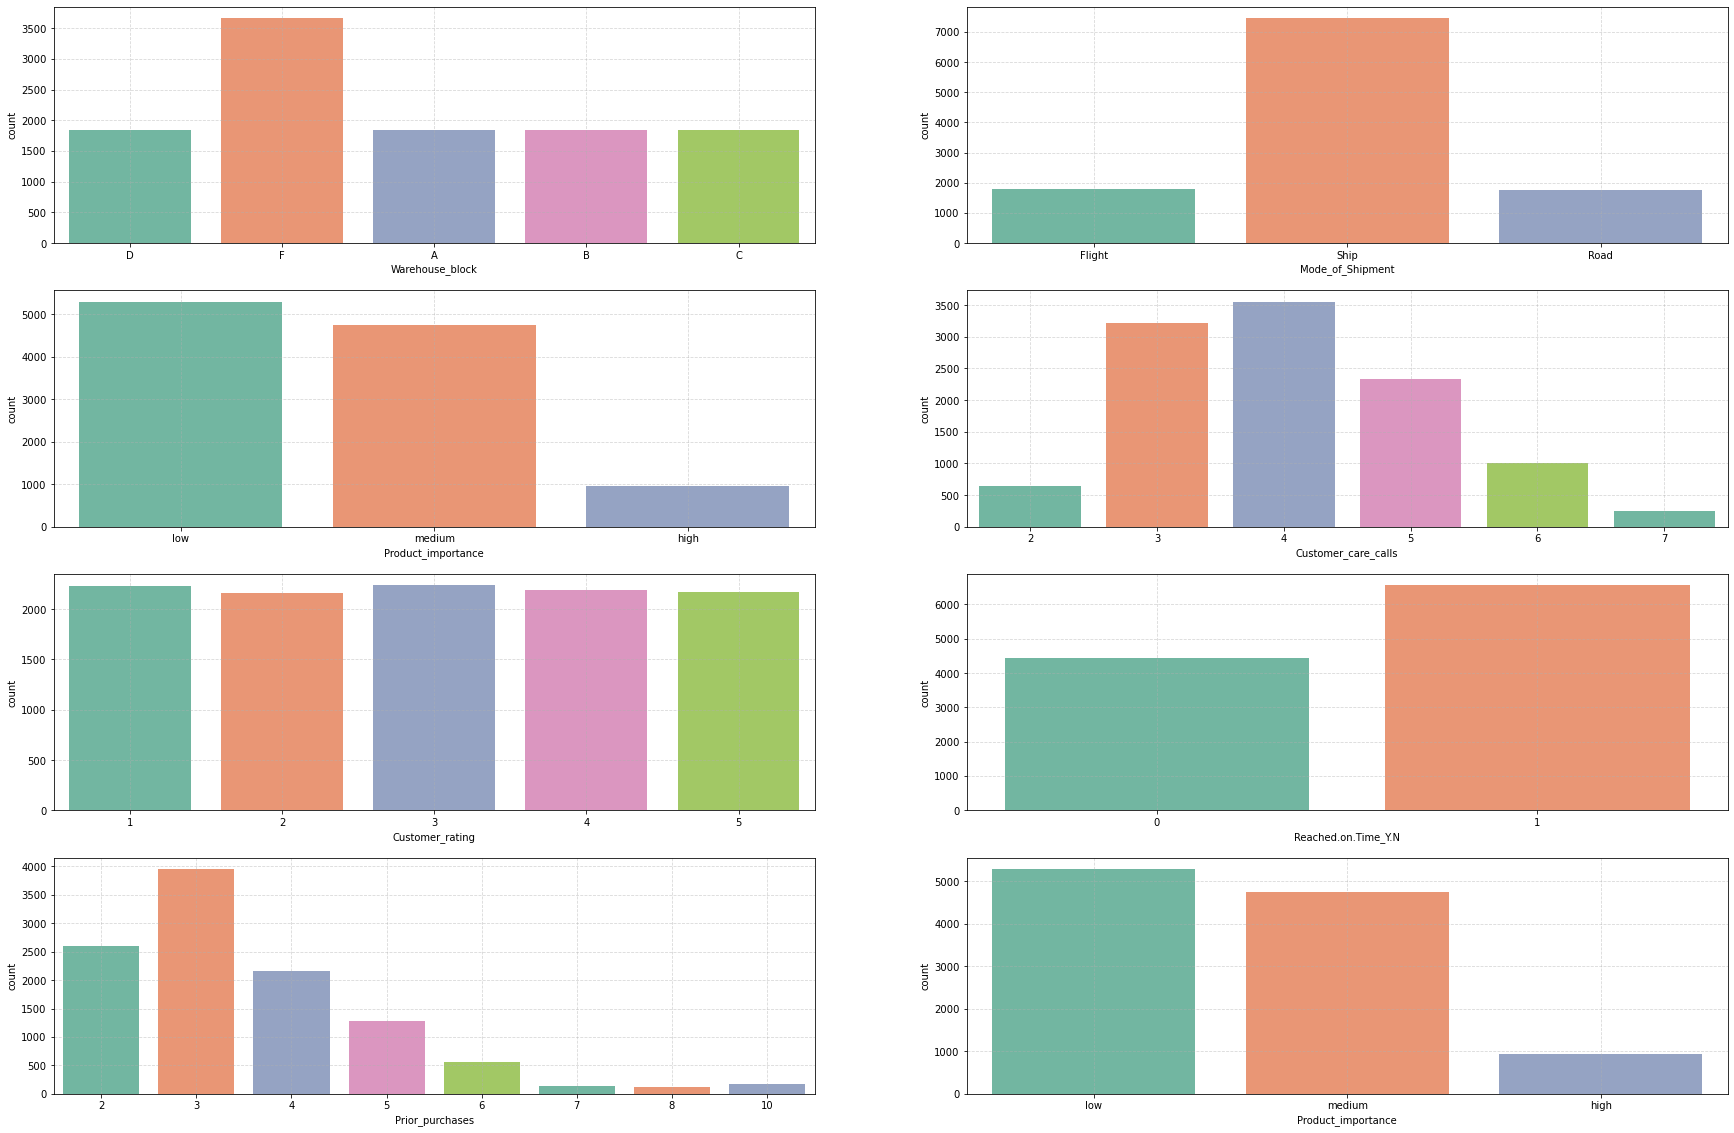

In [8]:
# plot size
fig, axes = plt.subplots(4,2, figsize = (30, 20))

# feature for compare
features_2 = ['Warehouse_block','Mode_of_Shipment','Product_importance','Customer_care_calls',
       'Customer_rating', 'Reached.on.Time_Y.N', 'Prior_purchases',
       'Product_importance']

# countplot
k=1
for i in range(len(features_2)):
  if k <= 8:
    plt.subplot(4,2,k)
    sns.countplot(df[features_2[i]],palette = colors)
    i += 1
    k += 1
    plt.grid(alpha = 0.5, linestyle = '--')
plt.show()

# Feature Analysist ( base on which Reach on Time or not)

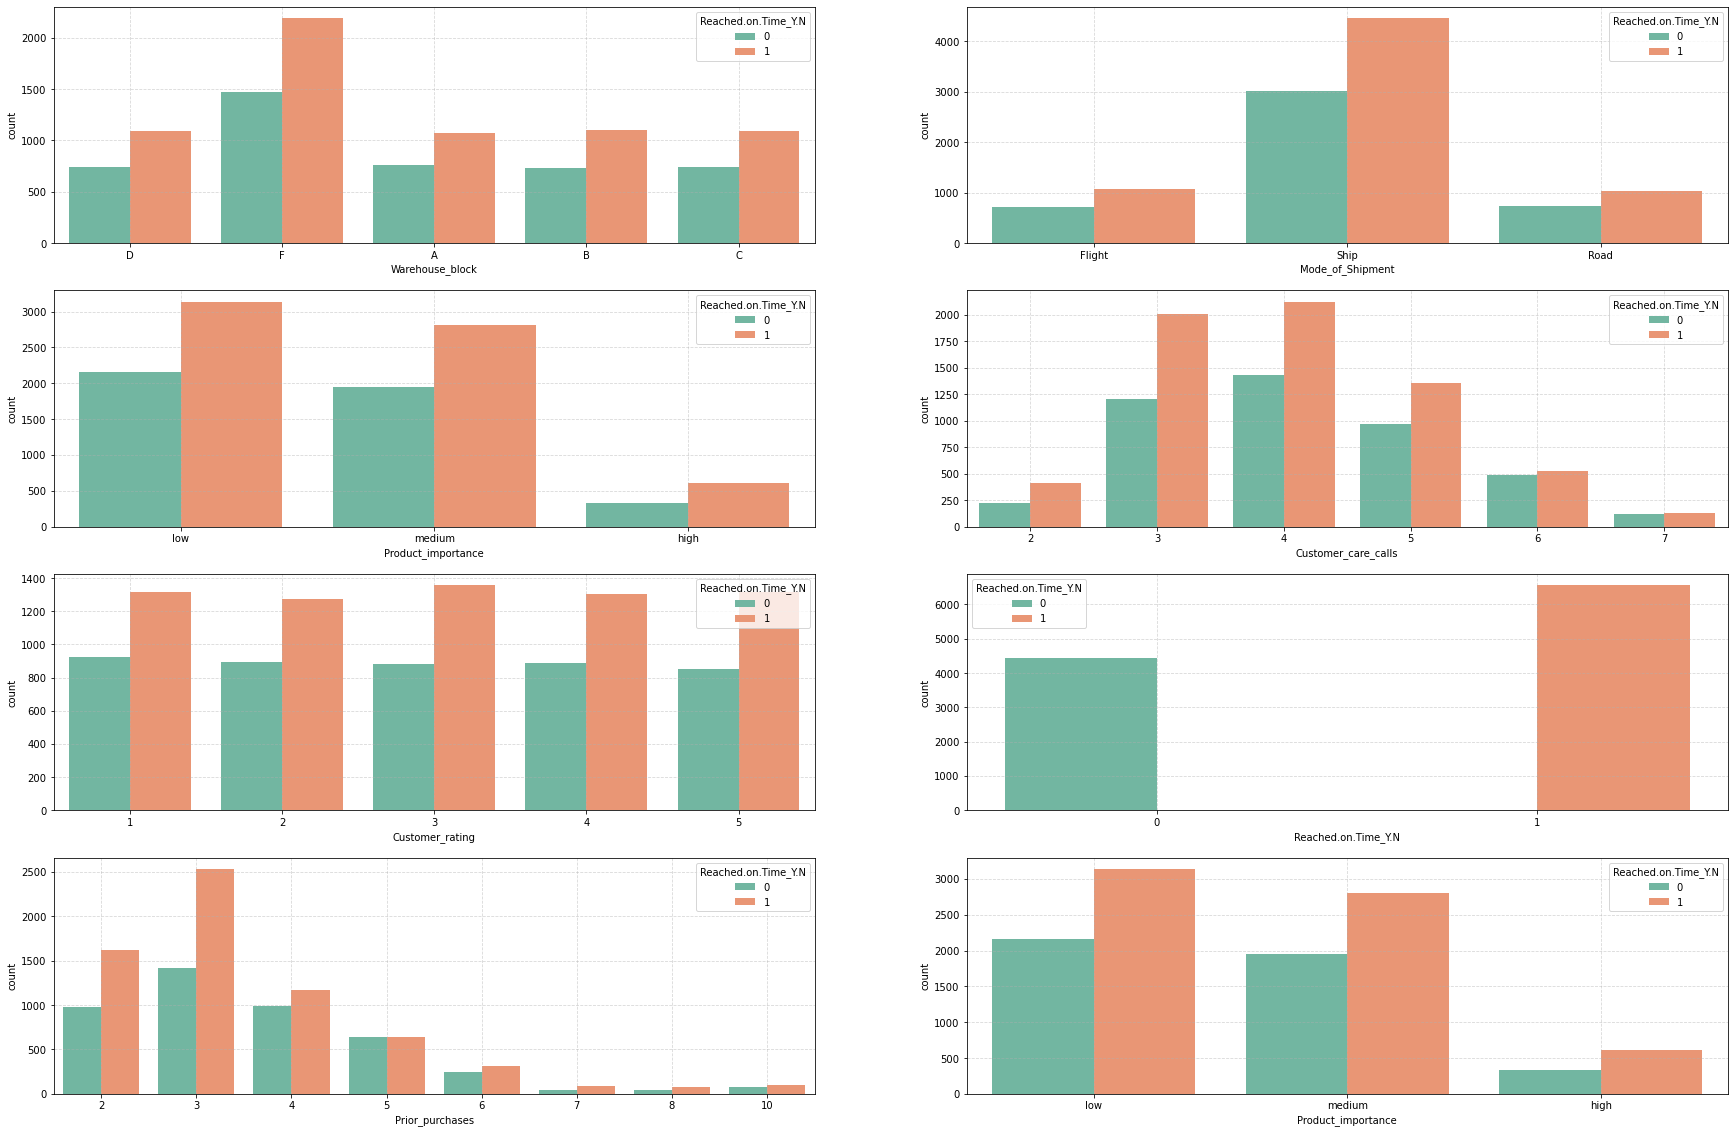

In [9]:
# plot size
fig, axes = plt.subplots(4,2, figsize = (30, 20))

# choose features
features_3 = ['Warehouse_block','Mode_of_Shipment','Product_importance','Customer_care_calls',
       'Customer_rating', 'Reached.on.Time_Y.N', 'Prior_purchases',
       'Product_importance']
       
# countplot
k=1
for i in range(len(features_2)):
  if k <= 8:
    plt.subplot(4,2,k)
    sns.countplot(features_2[i], hue = 'Reached.on.Time_Y.N' ,palette = colors, data = df)
    i += 1
    k += 1
    plt.grid(alpha = 0.5, linestyle = '--')

plt.show()

In [10]:
df_num.columns.tolist()

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

# Which columns is related with Reach on Time.Y.N ?

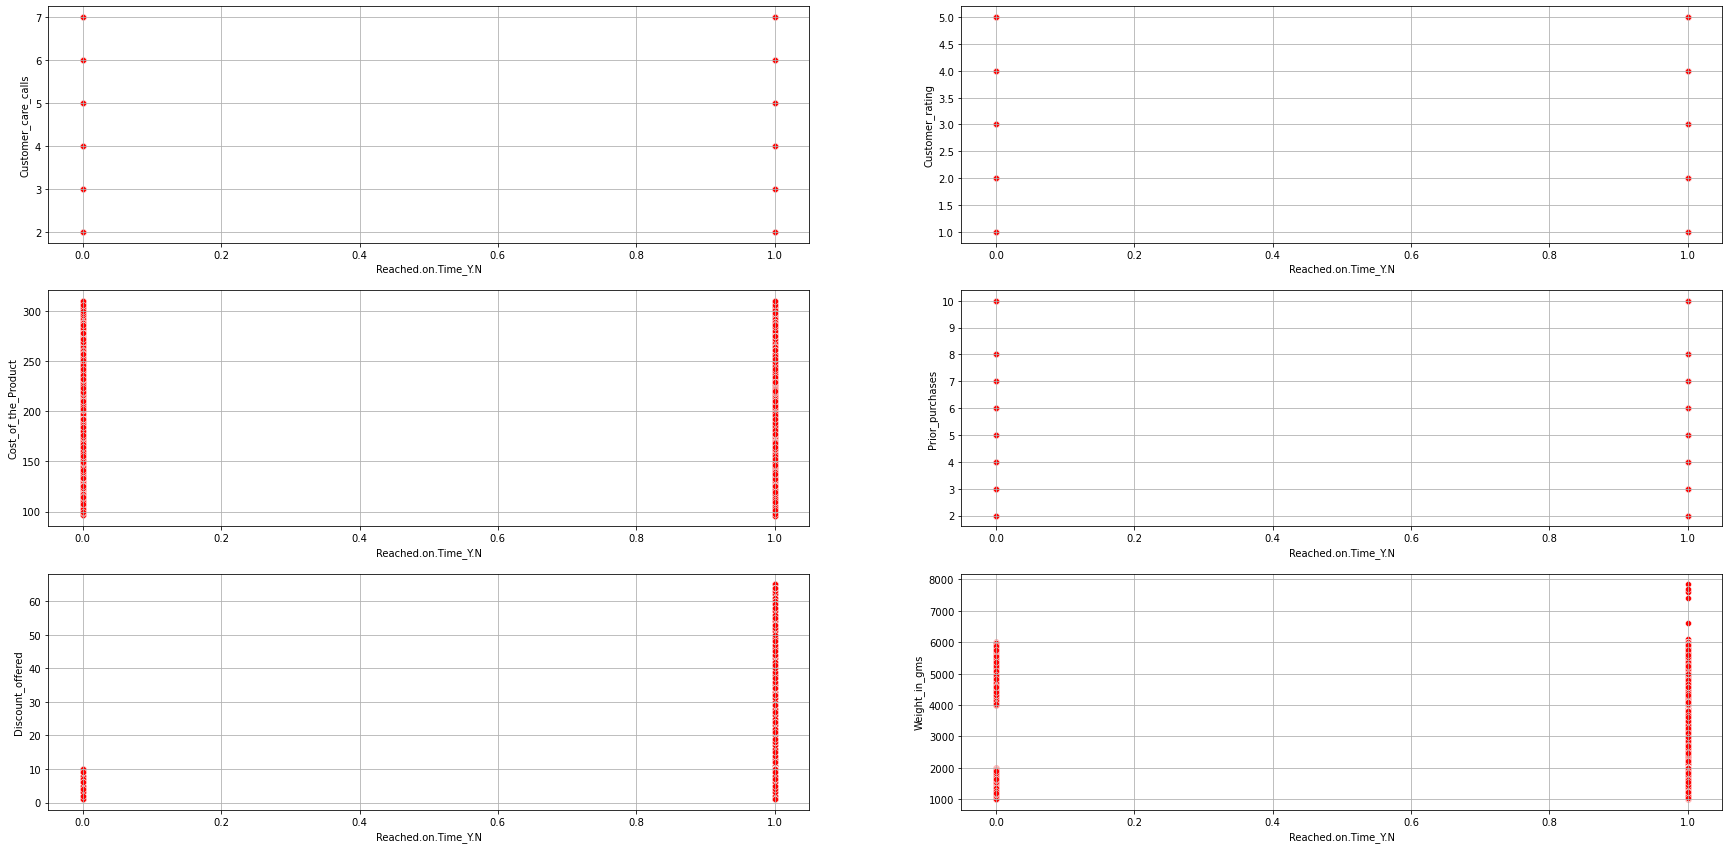

In [11]:
# fig size
fig, axes = plt.subplots(3,2, figsize = (30, 20))

# choose features
features_4 = df_num.columns[:-1].tolist()

# scatterplot 
k=1
for i in range(len(features_4)):
  if k <= 6:   
    plt.subplot(4,2,k)
    sns.scatterplot(x='Reached.on.Time_Y.N', y= features_4[i], data = df, color = 'r')
    plt.grid()
    k +=1
    i +=1

plt.show()

#Positive correlation

## (Cost of product) and (Customer care calls)

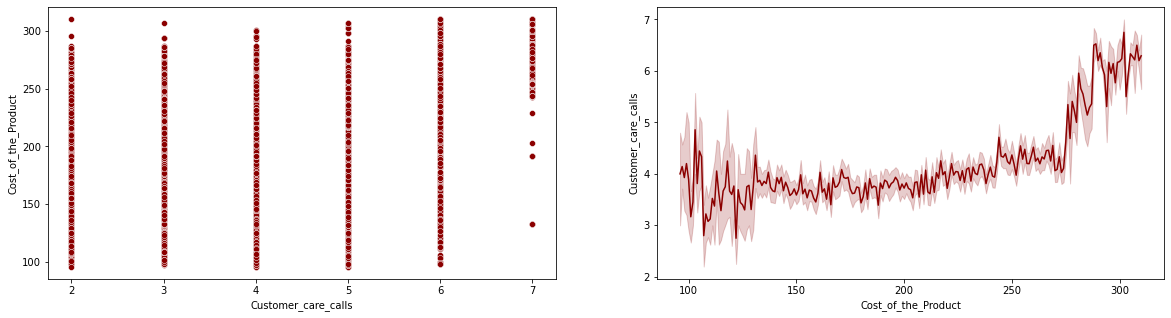

In [12]:
# fig size
fig, axes = plt.subplots(1,2, figsize = (20, 5))

# scatterplot
plt.subplot(1,2,1)
df_cost_calls = df.loc[:,['Cost_of_the_Product','Customer_care_calls']]
sns.scatterplot(data = df_cost_calls, y='Cost_of_the_Product', x='Customer_care_calls', color = 'darkred')

# lineplot
plt.subplot(1,2,2)
sns.lineplot(x='Cost_of_the_Product', y='Customer_care_calls', data= df_cost_calls, color = 'darkred')
plt.show()

##(Discount offered) and (Reach on time_Y.N)

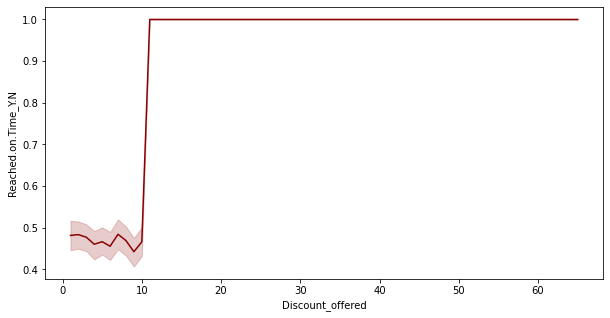

In [13]:
# fig size
plt.figure(figsize = (10,5))

# scatterplot
df_dis_rot = df.loc[:,['Discount_offered','Reached.on.Time_Y.N']]
sns.lineplot(x='Discount_offered' , y='Reached.on.Time_Y.N', data = df_dis_rot, color = 'darkred')
plt.show()

#Negative Correlation

## (Weight in gms) and (Customer care calls)

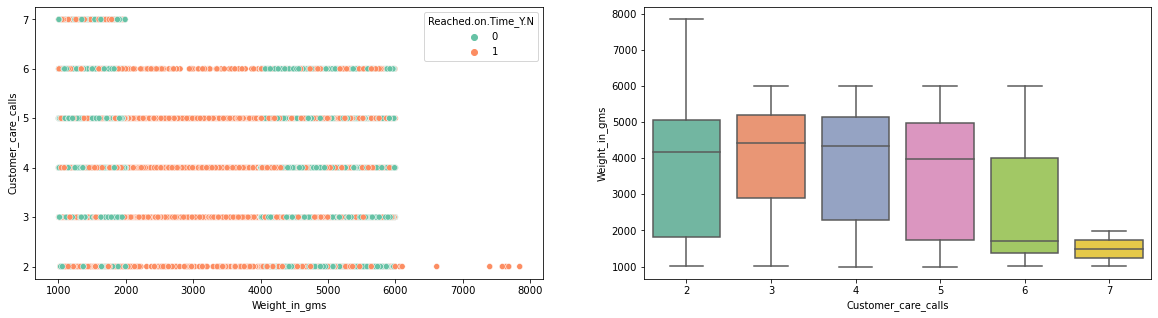

In [14]:
# fig size
fig, axes = plt.subplots(1,2, figsize = (20, 5))

# scatterplot
plt.subplot(1,2,1)
df_cus_wig = df.loc[:,['Customer_care_calls','Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Customer_care_calls', data = df_cus_wig, palette='Set2', hue = 'Reached.on.Time_Y.N')

# boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Customer_care_calls', y='Weight_in_gms', data = df_cus_wig, palette = 'Set2')
plt.show()

## (Weight_in_gms) and (Discount offered)


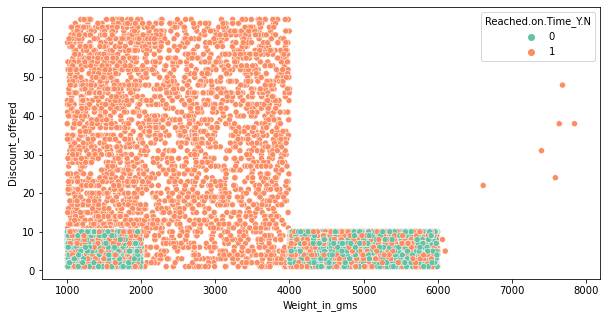

In [15]:
# scatterplot
plt.figure(figsize= (10,5))
df_dis_wig = df.loc[:,['Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Discount_offered', data = df_dis_wig, palette = 'Set2', hue = 'Reached.on.Time_Y.N')
plt.show()

## (Weight_in_gms) and (Reached.on.Time_Y.N)

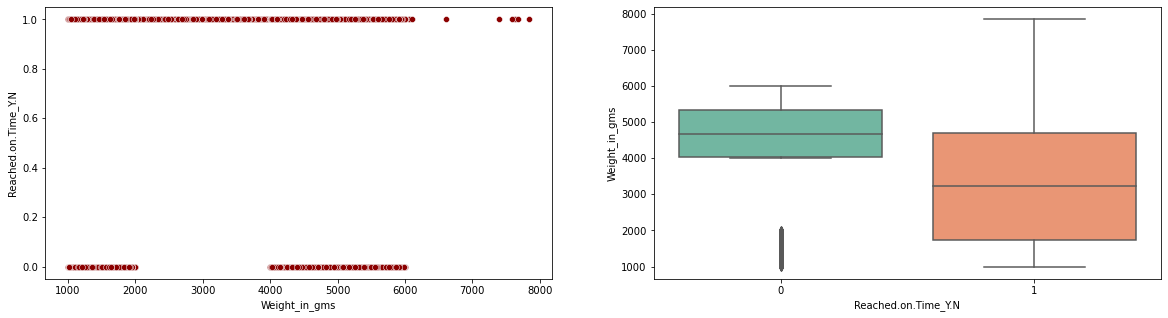

In [16]:
# fig size
fig, axes = plt.subplots(1,2, figsize = (20, 5))

# scatterplot
plt.subplot(1,2,1)
df_rot_wig = df.loc[:,['Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Reached.on.Time_Y.N', data = df_rot_wig, color ='darkred')

# boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data = df_cus_wig, palette = 'Set2')
plt.show()

### 1. What was Customer Rating? And was the product delivered on time?
### 2. If Product importance is high. having higest rating or being delivered on time?

## 1. Customer_rating and Reached on Time

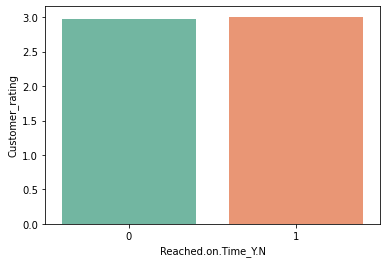

In [17]:
df_1 = df.groupby('Reached.on.Time_Y.N').mean().reset_index()
sns.barplot(data = df_1 , x ='Reached.on.Time_Y.N', y='Customer_rating',palette = colors)
plt.show()

## 2. Higest raing and High importance product with Reached on Time

In [18]:
df_3 = df[(df['Product_importance'] =='high') & (df['Customer_rating'] == 5)]

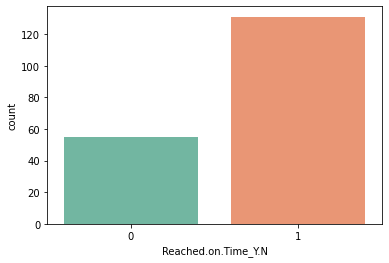

In [19]:
sns.countplot(x ='Reached.on.Time_Y.N' ,palette = colors, data = df_3)
plt.show()

---

## Predict Reached.on.Time_Y.N 

## Precision을 중요시 해야하는 문제이지 않을까?

### Precision을 중요시한다 => FP (도착 할거라 했는데, 도착하지 않는 것이 고객한테 더 크리티컬 할 것이다.) 을 줄여야 함.
### => Threshold 값을 높여야 한다.
### FN : 도착하지 않을 것이라 했지만, 도착을 했음 => 오히려 좋음


In [159]:
target = 'Reached.on.Time_Y.N'
train = pd.read_csv('Train.csv')

In [160]:
train, test = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=42)
train, val = train_test_split(train, train_size = 0.8, test_size = 0.2, stratify = train[target], random_state =2)
print(f'{train.shape} \n{val.shape}\n{test.shape}')

(7039, 12) 
(1760, 12)
(2200, 12)


## Data divide

In [161]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
x_test = test[features]
y_test = test[target]

## Base_Model

In [162]:
y_train = train[target]
y_train.value_counts(normalize = True)
major = y_train.mode()[0]
y_pred = [major] * len(y_train)
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5966756641568405


## LogisticRegression

In [163]:
encoder_1 = OneHotEncoder(use_cat_names= True)
ecd_train = encoder_1.fit_transform(X_train)
ecd_val = encoder_1.transform(X_val)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(ecd_train)
X_val_scaled = scaler.transform(ecd_val)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print(f"train 데이터셋 정확도 : {model.score(X_train_scaled, y_train)}/ntest 검증셋 정확도 : {model.score(X_val_scaled, y_val)}")

train 데이터셋 정확도 : 0.6547805085949708/ntest 검증셋 정확도 : 0.6670454545454545


### Features Importance

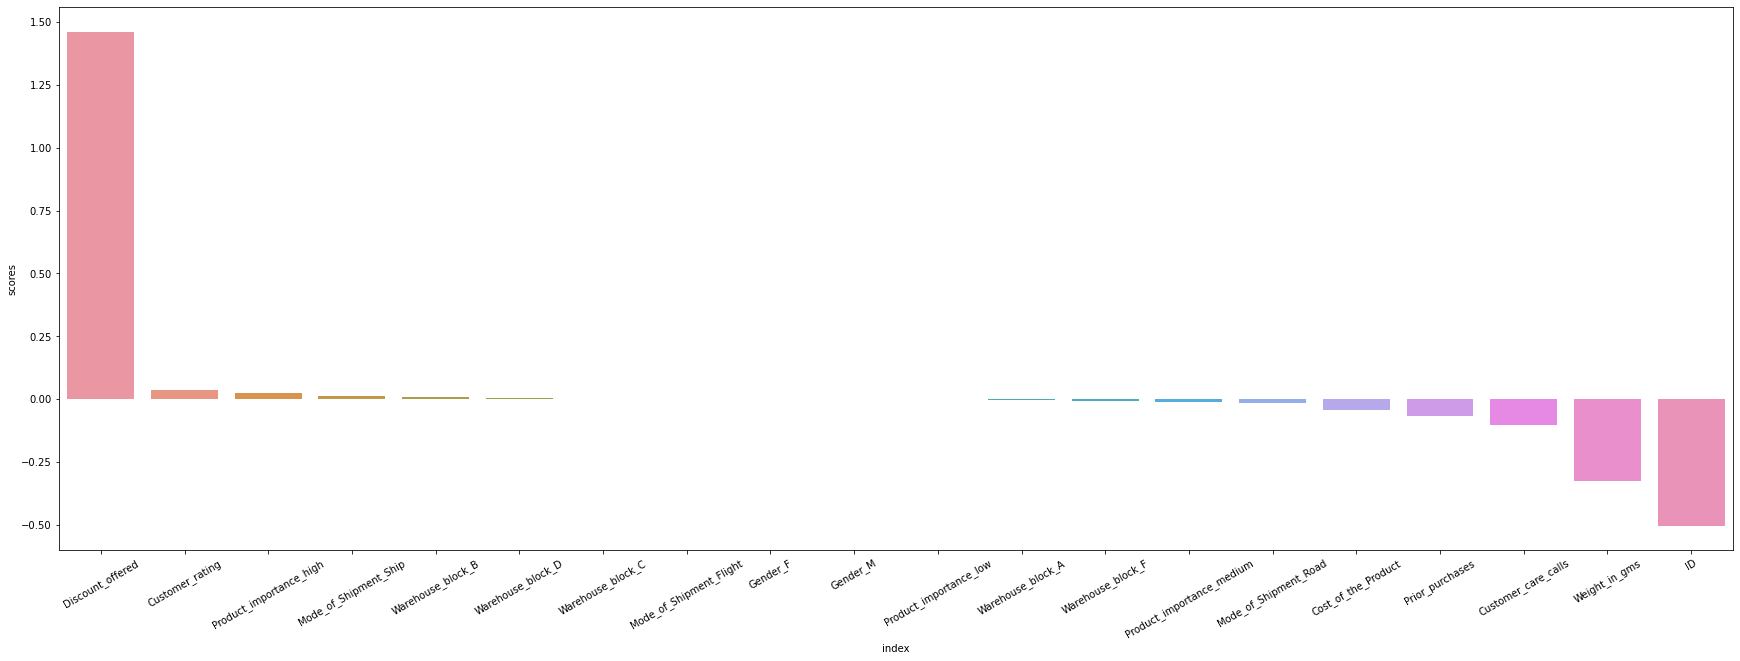

In [164]:
model_coef = pd.Series(model.coef_[0], ecd_train.columns).sort_values(ascending=False)
data = pd.DataFrame(model_coef).reset_index()
data.rename(columns = {0 : 'scores'}, inplace = True)

plt.figure(figsize = [30,10])
ax = sns.barplot(x='index', y='scores', data = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

### Apply Threshold

In [165]:
threshold =[0.55, 0.6, 0.65, 0.7,0.75]
score_list = []

for i in threshold:
    y_pred = (model.predict_proba(X_train_scaled)[:,1] > i).astype(int)
    Acc_score = accuracy_score(y_train,y_pred)
    score_list.append(Acc_score)

score_list

[0.6651512999005541,
 0.6755220912061373,
 0.6803523227731212,
 0.6797840602358289,
 0.6692712032959227]

## Threshold = 0.5 , Confusion matrix

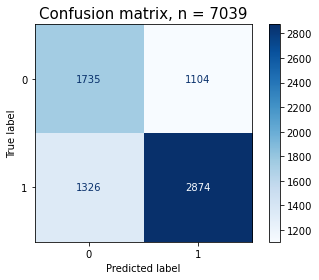

In [166]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_train_scaled, y_train,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_train)}', fontsize=15)
plt.show()

## Threshold = 0.65 , Confusion matrix

In [167]:
from sklearn.metrics import confusion_matrix

threshold = 0.65
y_pred = (model.predict_proba(X_train_scaled)[:, 1] > threshold).astype(int)
confusion_matrix(y_train, y_pred)

array([[2696,  143],
       [2107, 2093]])

## Cross Validation

In [168]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores.mean()

Cross-Validation Accuracy Scores [0.64346591 0.640625   0.65056818 0.66193182 0.64488636 0.69318182
 0.62784091 0.65625    0.64772727 0.64438122]


0.6510858496055864

## Desicion Tree

In [170]:
pipe_tree = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier()
)
pipe_tree.fit(X_train, y_train)
print("훈련세트 정확도 : ", pipe_tree.score(X_train, y_train))
print("검증세트 정확도 : ", pipe_tree.score(X_val, y_val))
print("테스트세트 정확도 : ", pipe_tree.score(x_test, y_test))

훈련세트 정확도 :  1.0
검증세트 정확도 :  0.6494318181818182
테스트세트 정확도 :  0.6477272727272727


## 과적합 해결하기
### max_depth 조절

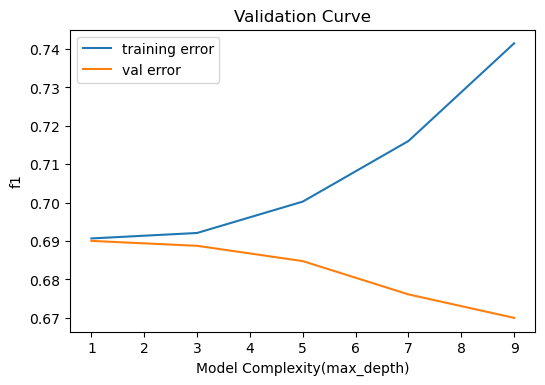

In [210]:
pipe = make_pipeline(
    OneHotEncoder(),
    DecisionTreeClassifier()
)

depth = range(1, 10, 2)
ts, vs = validation_curve(
    pipe, X_train, y_train
    , param_name='decisiontreeclassifier__max_depth'
    , param_range=depth, scoring='accuracy'
    , cv=3
    , n_jobs=-1
)

train_scores_mean = np.mean(ts, axis=1)
val_scores_mean = np.mean(vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, val_scores_mean, label='val error')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='f1')
ax.legend()
fig.dpi = 100

In [202]:
pipe_tree = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth = 3)
)
pipe_tree.fit(X_train, y_train)
print("훈련세트 정확도 : ", pipe_tree.score(X_train, y_train))
print("검증세트 정확도 : ", pipe_tree.score(X_val, y_val))
print("테스트세트 정확도 : ", pipe_tree.score(x_test, y_test))

훈련세트 정확도 :  0.6910072453473505
검증세트 정확도 :  0.6823863636363636
테스트세트 정확도 :  0.6840909090909091


## RandomForest

In [208]:
pipe_forest = make_pipeline(
    OneHotEncoder(),
    RandomForestClassifier(max_depth = 3, n_jobs =-1, random_state =42)
)
k = 3

scores = cross_val_score(pipe_forest, X_train, y_train, cv=k, 
                         scoring='accuracy')

print(f'f1 for {k} folds:', scores)
pipe_forest.fit(X_train, y_train)
print('검증정확도', pipe_forest.score(X_val, y_val))

f1 for 3 folds: [0.69066894 0.68712702 0.68286445]
검증정확도 0.6840909090909091


In [209]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

pipe_forest_clf = make_pipeline(
    OneHotEncoder(),      
    RandomForestClassifier(random_state=42)
)

dists = {   
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [3,5,7], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe_forest_clf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [211]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('accuracy: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.873245345395519, 'randomforestclassifier__n_estimators': 479}
accuracy:  0.6901538098674999


## Optimized RandomForest

In [227]:
pipe_Rf_opt = clf.best_estimator_
print(f'Train Data Accuracy : {pipe_Rf_opt.score(X_train,y_train)} \nVal Data Accuracy : {pipe_Rf_opt.score(X_val,y_val)}\nTest Data Accuracy : {pipe_Rf_opt.score(x_test, y_test)}')


Train Data Accuracy : 0.6937064923994886 
Val Data Accuracy : 0.6880681818181819
Test Data Accuracy : 0.6809090909090909


## AUC-ROC Curve

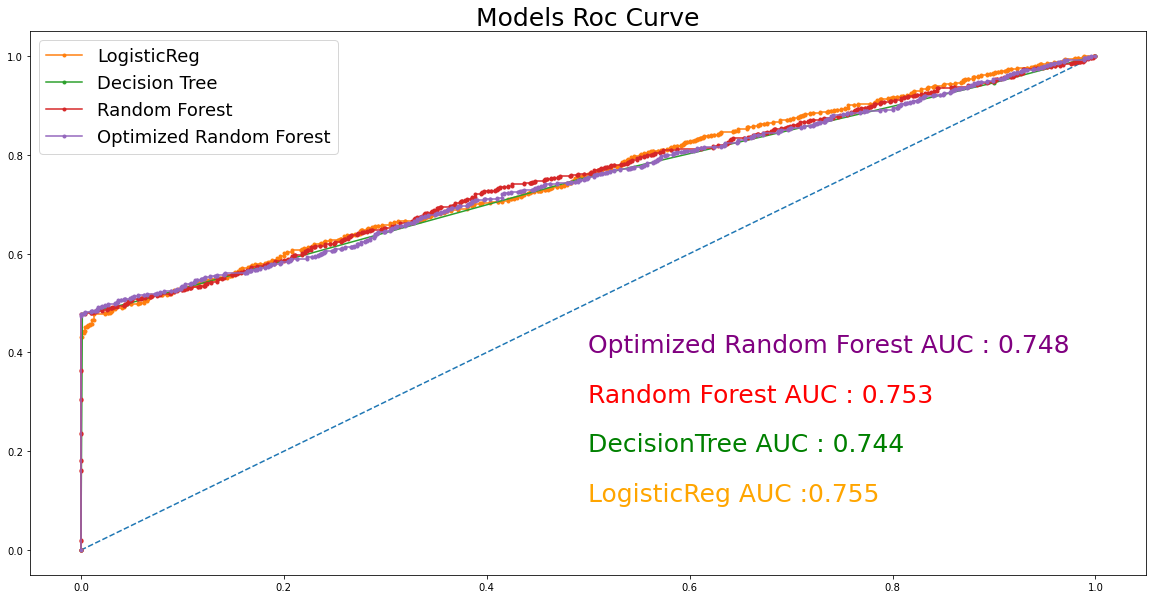

In [249]:
def rocvis(true , prob , label ) :
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label = label  )
    
   
fig , ax = plt.subplots(figsize= (20,10))
plt.plot([0, 1], [0, 1], linestyle='--')
rocvis(y_val , model.predict_proba(X_val_scaled)[:, 1] , "LogisticReg")
rocvis(y_val , pipe_tree.predict_proba(X_val)[:, 1] , "Decision Tree")
rocvis(y_val , pipe_forest.predict_proba(X_val)[:, 1] , "Random Forest")
rocvis(y_val , pipe_Rf_opt.predict_proba(X_val)[:, 1] , "Optimized Random Forest")
plt.legend(fontsize = 18)
plt.title("Models Roc Curve" , fontsize= 25)


plt.text(0.5, 0.1 , f'LogisticReg AUC :{round(roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1]),3)} ',c='orange',
        size = 25)
plt.text(0.5, 0.2 , f'DecisionTree AUC : {round(roc_auc_score(y_val, pipe_tree.predict_proba(X_val)[:, 1]),3)} ',c='green',
        size = 25)
plt.text(0.5, 0.3 , f'Random Forest AUC : {round(roc_auc_score(y_val, pipe_forest.predict_proba(X_val)[:, 1]),3)} ',c='red',
        size = 25)
plt.text(0.5, 0.4 , f'Optimized Random Forest AUC : {round(roc_auc_score(y_val, pipe_Rf_opt.predict_proba(X_val)[:, 1]),3)}',c='purple',
        size = 25)

plt.show()